# __Springboard Data Science Capstone 3 Project__
# _Predicting the Price of Energy_

### Data Wrangling & Exploratory Data Analysis

##### _Ben Takacs_
###### __Python version 3.10.4__

### __Imports and File Location__

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from functions import load_table_data, load_csv_data, arima_mse, model_eval, decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

datapath = './data/'

### __Load Relevant Tables from Data Set__

9.8 - Average price of electricity to ultimate customers

In [3]:
df98 = load_table_data('9-8.csv')

Data loaded from: 9-8.csv


## __Data Wrangling__

### __Table 9.8 - Average Price of Electricity to Ultimate Customers__

In [4]:
df98

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial","Average Price of Electricity to Ultimate Customers, Industrial","Average Price of Electricity to Ultimate Customers, Transportation","Average Price of Electricity to Ultimate Customers, Other","Average Price of Electricity to Ultimate Customers, Total"
Month,,,,,,
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-05-01,16.43,12.48,7.88,12.21,NaN,12.55
2024-06-01,16.42,13.07,8.40,12.74,NaN,13.23
2024-07-01,16.63,13.58,8.81,13.15,NaN,13.76


In [5]:
print(df98.info())
print(df98.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 585 entries, 1976-01-01 to 2024-09-01
Data columns (total 6 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Average Price of Electricity to Ultimate Customers, Residential     507 non-null    float64
 1   Average Price of Electricity to Ultimate Customers, Commercial      507 non-null    float64
 2   Average Price of Electricity to Ultimate Customers, Industrial      507 non-null    float64
 3   Average Price of Electricity to Ultimate Customers, Transportation  261 non-null    float64
 4   Average Price of Electricity to Ultimate Customers, Other           156 non-null    float64
 5   Average Price of Electricity to Ultimate Customers, Total           507 non-null    float64
dtypes: float64(6)
memory usage: 32.0 KB
None
Average Price of Electricity to Ultimate Customers, Res

In [6]:
# Check what total column is
today = '2024-07-01'
df98.loc[today]
print(df98.drop(columns=df98.columns[-1]).loc[today].mean())
print(df98['Average Price of Electricity to Ultimate Customers, Total'].loc[today])

13.0425
13.76


Total column is neither an average nor a sum of other columns, so I'm not sure how it's calculated and I don't think it should be used.

In [7]:
df98 = df98.drop(columns=df98.columns[2:])
df98

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial"
Month,,
1976-01-01,NaN,NaN
1976-02-01,NaN,NaN
1976-03-01,NaN,NaN
1976-04-01,NaN,NaN
1976-05-01,NaN,NaN
...,...,...
2024-05-01,16.43,12.48
2024-06-01,16.42,13.07
2024-07-01,16.63,13.58


<Figure size 640x480 with 0 Axes>

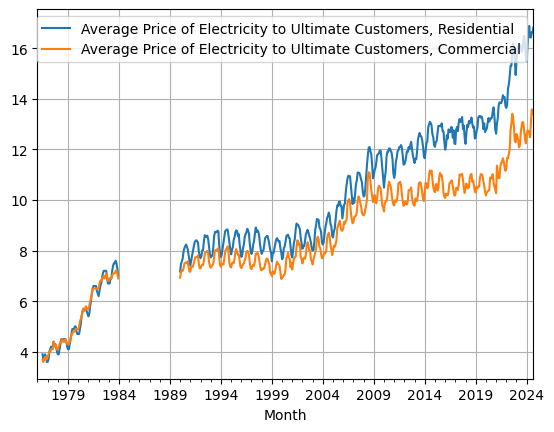

In [8]:
plt.figure()
df98.plot()
plt.grid(True)
plt.show()

Just take data from beyond ~1989

In [9]:
df98[('1989-1-1' < df98.index) & (df98.index < '1991-1-1')]

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial"
Month,,
1989-02-01,NaN,NaN
1989-03-01,NaN,NaN
1989-04-01,NaN,NaN
1989-05-01,NaN,NaN
1989-06-01,NaN,NaN
1989-07-01,NaN,NaN
1989-08-01,NaN,NaN
1989-09-01,NaN,NaN
1989-10-01,NaN,NaN


NaN values end 1989-12-1, so take values beyond 1990

In [10]:
df98 = df98[df98.index > '1990']
df98

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial"
Month,,
1990-02-01,7.48,7.15
1990-03-01,7.57,7.23
1990-04-01,7.69,7.20
1990-05-01,7.96,7.31
1990-06-01,8.10,7.49
...,...,...
2024-05-01,16.43,12.48
2024-06-01,16.42,13.07
2024-07-01,16.63,13.58


<Axes: xlabel='Month'>

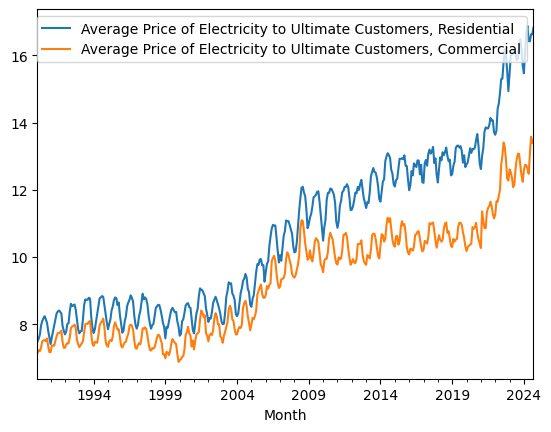

In [11]:
df98.plot()

If needed later we can truncate df43 to values after 1990 as well.

Final dataframe

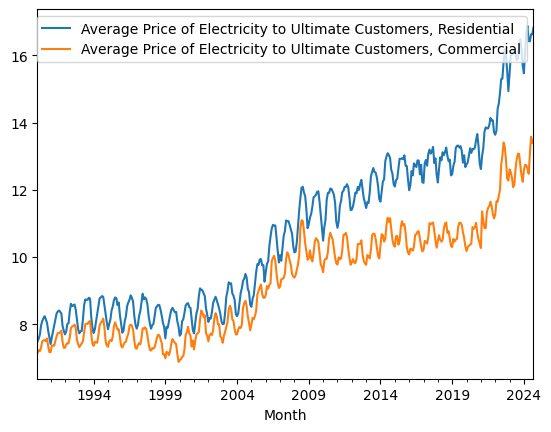

In [12]:
df98.plot()
plt.show()

### __Save Data__

In [13]:
df98.to_csv(datapath + 'df98.csv')

## __Exploratory Data Analysis__

### Average price of electricity to ultimate customers, commercial

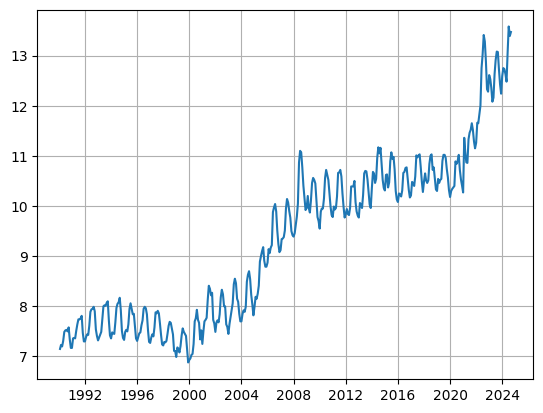

In [14]:
y98c = df98['Average Price of Electricity to Ultimate Customers, Commercial']

plt.figure()
plt.plot(y98c)
plt.grid(True)
plt.show()

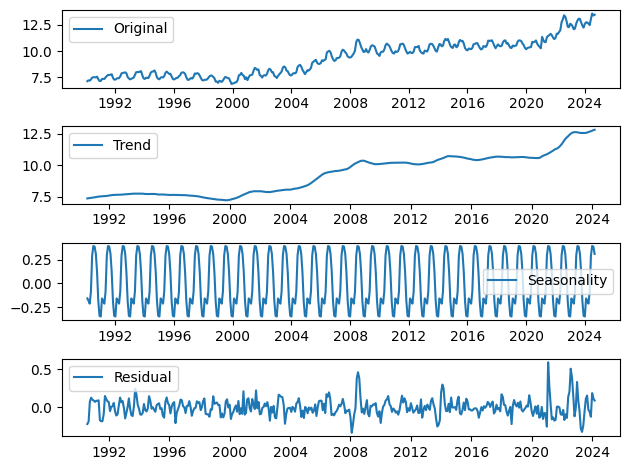

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_78864/2540204679.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98c)[1]))


In [15]:
# Check for stationarity of data
decomposition(y98c)
print('KPSS Probability: {}'.format(kpss(y98c)[1]))

p < 0.05, reject null hypothesis (stationary data), so we must transform it to be stationary by differencing

In [16]:
# y98c_d = pd.DataFrame(y98c.diff().dropna())
y98c_d = np.diff(y98c)
print('KPSS Probability: {}'.format(kpss(y98c_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_78864/694795797.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98c_d)[1]))


p > 0.05, fail to reject null hypothesis, so data is stationary and ready to be modeled. 

### Residential

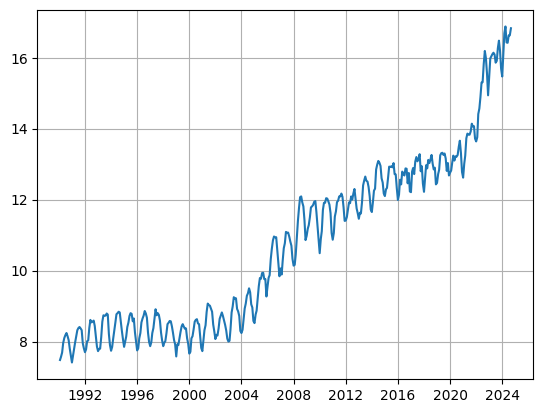

In [17]:
y98r = df98['Average Price of Electricity to Ultimate Customers, Residential']

plt.figure()
plt.plot(y98r)
plt.grid(True)
plt.show()

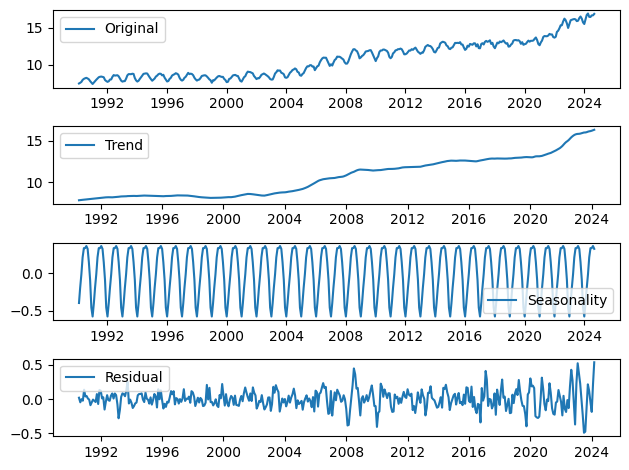

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_78864/2007027840.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98r)[1]))


In [18]:
decomposition(y98r)
print('KPSS Probability: {}'.format(kpss(y98r)[1]))

In [19]:
y98r_d = np.diff(y98r)
print('KPSS Probability: {}'.format(kpss(y98r_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_78864/465628779.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98r_d)[1]))


p > 0.05, fail to reject null hypothesis, so data is now stationary and ready to be modeled. 

## __Check for Trends in Data__

We can compare the two average prices of electricity to different features from other tables.

### __Load New Tables__

In [20]:
df13 = load_table_data('1-3.csv') # primary energy consumption by source
df38 = load_table_data('3-8a.csv') # res & commercial sectors
df43 = load_table_data('4-3.csv') # consumption by sector

Data loaded from: 1-3.csv
Data loaded from: 3-8a.csv
Data loaded from: 4-3.csv


In [21]:
df13.head()

,Coal Consumption,Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),Petroleum Consumption (Excluding Biofuels),Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Biomass Energy Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
Month,,,,,,,,,,,,
1973-01-01,1.166191,2.397308,3.185268,6.747651,0.068103,0.089562,0.000490,NaN,NaN,0.129787,0.219839,7.039731
1973-02-01,1.050588,2.170646,2.941986,6.163095,0.064634,0.079544,0.000448,NaN,NaN,0.117338,0.197330,6.428796
1973-03-01,1.046856,2.057315,2.942485,6.044647,0.072494,0.088284,0.000464,NaN,NaN,0.129938,0.218686,6.339964
1973-04-01,0.998979,1.873535,2.621315,5.493184,0.064070,0.083152,0.000542,NaN,NaN,0.125636,0.209330,5.770589
1973-05-01,1.014502,1.765309,2.836567,5.613551,0.062111,0.085643,0.000505,NaN,NaN,0.129834,0.215982,5.895781


In [22]:
df38.head()

,Distillate Fuel Oil Consumed by the Residential Sector,Propane Consumed by the Residential Sector,Kerosene Consumed by the Residential Sector,Total Petroleum Consumed by the Residential Sector,Distillate Fuel Oil Consumed by the Commercial Sector,Propane Consumed by the Commercial Sector,Kerosene Consumed by the Commercial Sector,Motor Gasoline Consumed by the Commercial Sector,Petroleum Coke Consumed by the Commercial Sector,Residual Fuel Oil Consumed by the Commercial Sector,Total Petroleum Consumed by the Commercial Sector
Month,,,,,,,,,,,
1973-01-01,308.231,92.111,36.213,436.556,99.020,18.525,10.316,6.759,NaN,102.378,236.999
1973-02-01,263.315,80.942,31.031,375.287,84.591,16.420,8.840,6.423,NaN,87.459,203.733
1973-03-01,205.950,59.985,17.904,283.839,66.161,14.072,5.100,7.196,NaN,68.403,160.932
1973-04-01,144.100,47.684,14.082,205.866,46.292,12.182,4.012,6.994,NaN,47.863,117.342
1973-05-01,122.203,33.668,11.803,167.675,39.261,10.425,3.363,7.631,NaN,40.589,101.268


In [23]:
df43.head()

,Natural Gas Consumed by the Residential Sector,Natural Gas Consumed by the Commercial Sector,"Natural Gas Consumed by the Industrial Sector, Lease and Plant Fuel","Natural Gas Consumed by the Other Industrial Sector, CHP","Natural Gas Consumed by the Other Industrial Sector, Non-CHP","Natural Gas Consumed by the Other Industrial Sector, Total","Natural Gas Consumed by the Industrial Sector, Total","Natural Gas Consumed by the Transportation Sector, Pipelines and Distribution","Natural Gas Consumed by the Transportation Sector, Vehicle Fuel","Natural Gas Consumed by the Transportation Sector, Total",Natural Gas Consumed by the Electric Power Sector,"Natural Gas Consumption, Total"
Month,,,,,,,,,,,,
1973-01-01,843.900,392.315,0.0,NaN,0.0,0.0,810.141,77.544,NaN,77.544,224.100,2348.0
1973-02-01,747.331,394.281,0.0,NaN,0.0,0.0,698.671,70.212,NaN,70.212,215.505,2126.0
1973-03-01,648.504,310.799,0.0,NaN,0.0,0.0,731.583,66.546,NaN,66.546,257.568,2015.0
1973-04-01,465.867,231.943,0.0,NaN,0.0,0.0,807.360,60.602,NaN,60.602,269.228,1835.0
1973-05-01,326.313,174.258,0.0,NaN,0.0,0.0,852.091,57.101,NaN,57.101,319.237,1729.0


In [24]:
# Table with us population and GDP
dfc1 = pd.read_excel('./data/Table C1.xlsx', skiprows=[x for x in range(8)] + [9], index_col=0, header=[0])
dfc1.set_index(pd.to_datetime(dfc1.index, format='%Y'), inplace=True)

In [25]:
df = pd.merge(left=df98, right=df13, left_index=True, right_index=True)
df = pd.merge(left=df, right=df38, left_index=True, right_index=True)
df = pd.merge(left=df, right=df43, left_index=True, right_index=True)

In [26]:
df

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial",Coal Consumption,Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),Petroleum Consumption (Excluding Biofuels),Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,...,"Natural Gas Consumed by the Industrial Sector, Lease and Plant Fuel","Natural Gas Consumed by the Other Industrial Sector, CHP","Natural Gas Consumed by the Other Industrial Sector, Non-CHP","Natural Gas Consumed by the Other Industrial Sector, Total","Natural Gas Consumed by the Industrial Sector, Total","Natural Gas Consumed by the Transportation Sector, Pipelines and Distribution","Natural Gas Consumed by the Transportation Sector, Vehicle Fuel","Natural Gas Consumed by the Transportation Sector, Total",Natural Gas Consumed by the Electric Power Sector,"Natural Gas Consumption, Total"
Month,,,,,,,,,,,,,,,,,,,,,
1990-02-01,7.48,7.15,1.465526,1.907248,2.597232,5.970118,0.528705,0.086122,0.005032,0.003256,...,99.214,77.917,489.309,567.225,666.440,65.802,0.021,65.823,153.181,1864.019
1990-03-01,7.57,7.23,1.528733,1.870650,2.853453,6.253360,0.487694,0.098841,0.005540,0.004489,...,105.906,85.355,505.946,591.301,697.207,63.915,0.023,63.938,214.167,1829.320
1990-04-01,7.69,7.20,1.449803,1.668133,2.714167,5.831310,0.407576,0.090589,0.004526,0.004946,...,100.651,86.564,520.462,607.026,707.677,56.564,0.022,56.587,231.641,1631.800
1990-05-01,7.96,7.31,1.477073,1.452612,2.837106,5.766968,0.454445,0.095753,0.005220,0.005515,...,102.105,87.577,493.169,580.747,682.852,48.268,0.023,48.291,283.776,1420.835
1990-06-01,8.10,7.49,1.604918,1.350899,2.806675,5.763212,0.490288,0.098444,0.005368,0.005534,...,98.543,88.706,459.481,548.187,646.730,44.333,0.022,44.355,345.768,1321.763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,16.43,12.48,0.560214,2.407640,3.079024,6.044424,0.679097,0.077156,0.009627,0.111667,...,165.247,113.026,569.884,682.910,848.158,87.630,4.514,92.144,1045.631,2333.854
2024-06-01,16.42,13.07,0.717796,2.508172,2.900868,6.122030,0.712744,0.072234,0.009538,0.118688,...,161.627,109.745,543.041,652.786,814.413,91.237,4.368,95.605,1243.853,2429.912
2024-07-01,16.63,13.58,0.832522,2.832255,3.050890,6.714098,0.730441,0.072288,0.009904,0.119326,...,168.803,116.756,563.575,680.331,849.135,103.043,4.514,107.557,1534.444,2744.345


In [27]:
print(len(df.columns)-2)

35


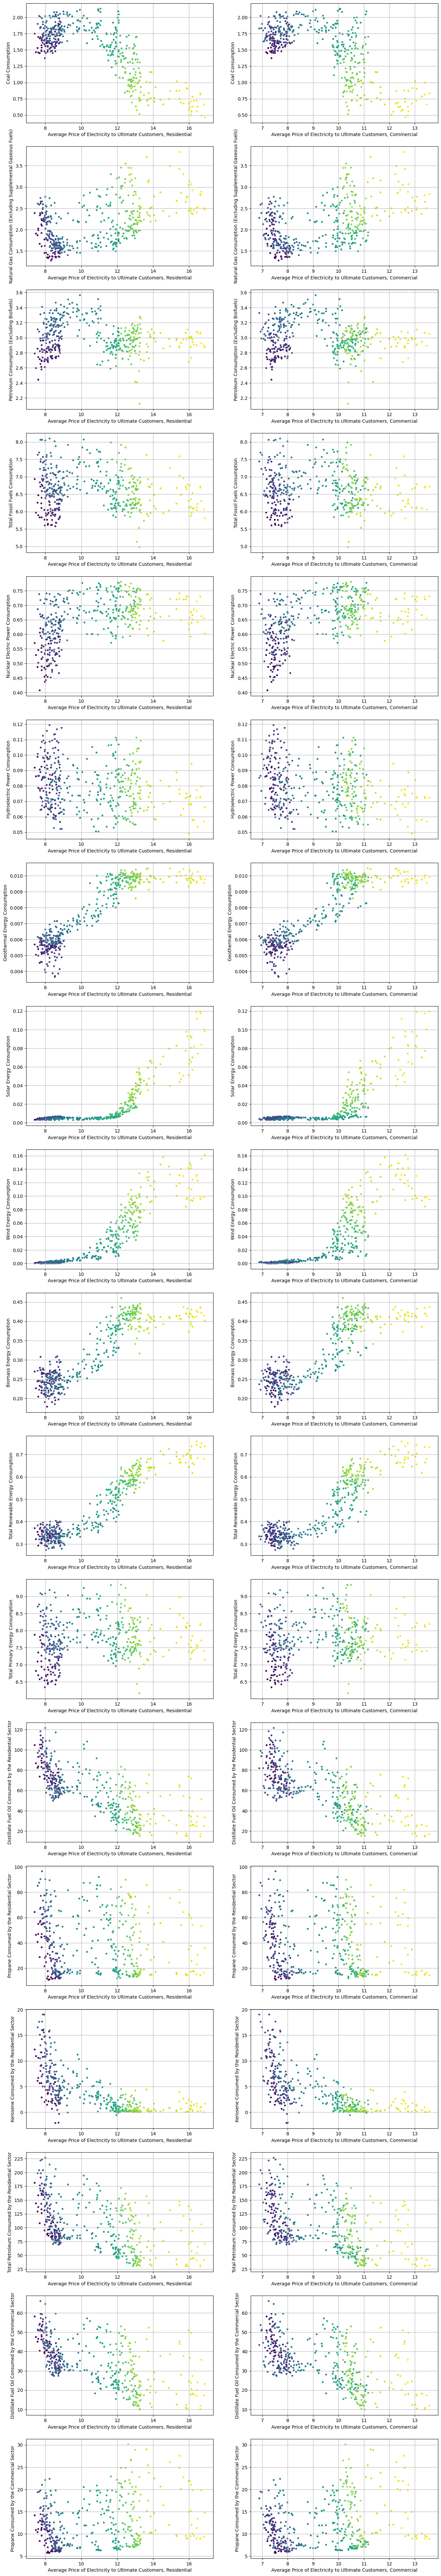

In [28]:
ncols = 2
nrows = 18

fig, axs = plt.subplots(nrows, ncols, figsize=(16, 100))
# axs = axs.flatten()

for i in range(ncols):
    for j in range(nrows):
        axs[j, i].scatter(df.iloc[:, i], df.iloc[:, j+2], c=df.index, marker='.')
        axs[j, i].set_xlabel(df.columns[i])
        axs[j, i].set_ylabel(df.columns[j+2])
        axs[j, i].grid(True)

plt.show()

Looking through comparisons with the average price of electricity, we do see some trends between consumption and price, a generally increasing trend with renewable energy types and some decay with fossil fuel types that are not used anymore (residual fuel oil, kerosene).

## __Investigating trend with Total Renewable/Petroleum Energy Consumption__

In [29]:
# Imports

import statsmodels.api as sm
import scipy.stats

In [30]:
# Going to focus on Residential electricity price.
df1 = df[['Average Price of Electricity to Ultimate Customers, Residential', 'Total Renewable Energy Consumption', 'Total Petroleum Consumed by the Residential Sector']]
df1

,"Average Price of Electricity to Ultimate Customers, Residential",Total Renewable Energy Consumption,Total Petroleum Consumed by the Residential Sector
Month,,,
1990-02-01,7.48,0.321465,143.972
1990-03-01,7.57,0.353956,129.117
1990-04-01,7.69,0.334136,108.024
1990-05-01,7.96,0.317791,94.930
1990-06-01,8.10,0.289276,87.671
...,...,...,...
2024-05-01,16.43,0.758321,53.691
2024-06-01,16.42,0.742351,40.900
2024-07-01,16.63,0.733689,31.619


Neither price nor consumption are normally distributed, so we'll use a Spearman correlation test.

In [31]:
corr_price_renew = scipy.stats.spearmanr(df1['Average Price of Electricity to Ultimate Customers, Residential'], df1['Total Renewable Energy Consumption'])
print(corr_price_renew)

SignificanceResult(statistic=0.8819135855770499, pvalue=2.722536936897786e-137)


p < 0.05 indicates statistically significant positive correlatoin (statistic > 0) between renewable energy consumption and price.

In [32]:
corr_price_petrol = scipy.stats.spearmanr(df1['Average Price of Electricity to Ultimate Customers, Residential'], df1['Total Petroleum Consumed by the Residential Sector'])
print(corr_price_petrol)

SignificanceResult(statistic=-0.5748933346422578, pvalue=5.775051791598826e-38)


p < 0.05 indicates statistically significant negative correlation (statistic < 0) between renewable energy consumption and price.

Although there are statistically significant correlations, the strength of the correlations are not very strong, especially petroleum consumption.

### Save Final DF

In [33]:
df1.to_csv(datapath + 'df1.csv')

## __Conclusion__

We were able to create stationary data for all variables we're interested in, and found some trends between different types of energy consumption and price. We'll continue to explore these trends in the next section, where the features we are keeping are Average Price of Electricity to Ultimate Customers, Residential, Total Renewable Energy Consumption, and Total Petroleum Consumption.